In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 15, 10

## Task 1

In [2]:
class precision:
  main = 0.00001
  bound = 0.001
  grid = 0.001

**Task condition configuration**

In [3]:
# f1 = lambda x: 2*np.exp(-(x**2))
# f2 = lambda x: 7*np.exp(-(x**2))*np.sin(x)
f1 = lambda x: 5*np.log(x + 9)
f2 = lambda x: -12 + 4*x

f1_ = 10
f2_ = 2

base_range = [0.001, 5]
base_arrange = np.arange(base_range[0], base_range[1], precision.grid)
pareto_arrange = None
base_arrange

array([1.000e-03, 2.000e-03, 3.000e-03, ..., 4.997e+00, 4.998e+00,
       4.999e+00])

**We determine the segments on which the conditions are satisfied** <br>
f1(x) > f1* <br>
f2(x) > f2*

In [4]:
f1_range = f1(base_arrange) >= f1_
f2_range = f2(base_arrange) >= f2_

print(f1_)
print("f1_range ", f1_range)

print(f2_)
print("f2_range ", f2_range)

range_intersection = np.logical_and(f1_range, f2_range)
pareto_arrange = base_arrange[range_intersection]

print('pareto arrange: ', pareto_arrange)

assert base_arrange.shape == f1_range.shape
assert base_arrange.shape == f2_range.shape

print(f'{pareto_arrange.min()} {pareto_arrange.max()}')

10
f1_range  [ True  True  True ...  True  True  True]
2
f2_range  [False False False ...  True  True  True]
pareto arrange:  [3.5   3.501 3.502 ... 4.997 4.998 4.999]
3.5 4.9990000000000006



**Boolean mask of pareto set**

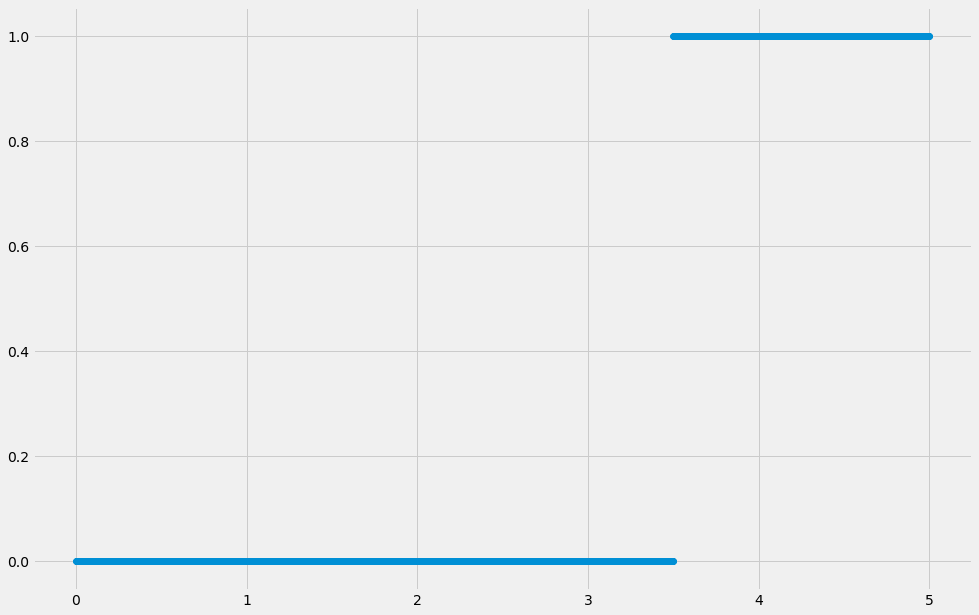

In [5]:
plt.scatter(base_arrange, range_intersection)

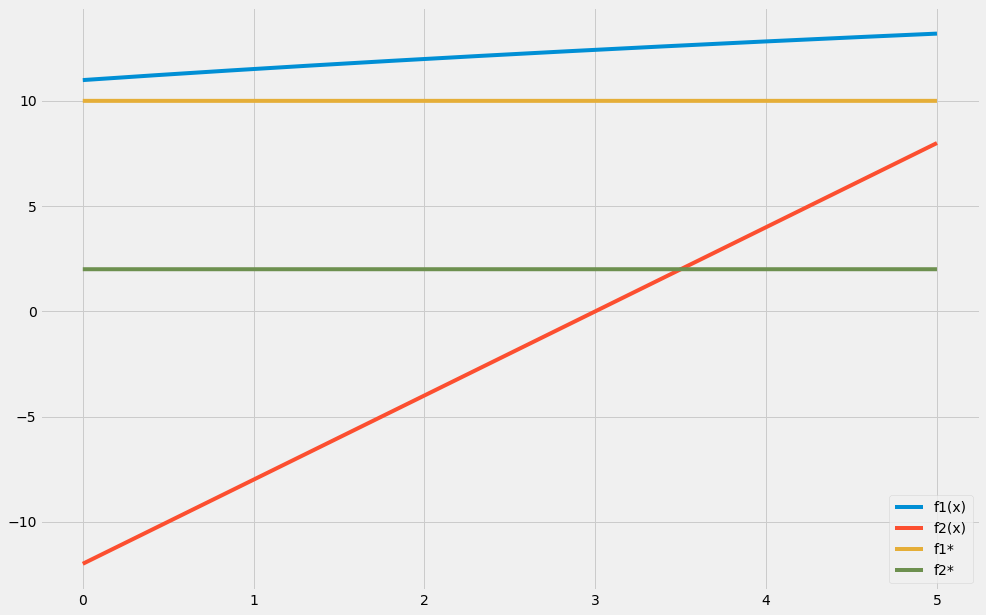

In [6]:
plt.plot(base_arrange, f1(base_arrange), label='f1(x)')
plt.plot(base_arrange, f2(base_arrange), label='f2(x)')
plt.plot(base_arrange, np.full(base_arrange.shape, f1_), label='f1*')
plt.plot(base_arrange, np.full(base_arrange.shape, f2_), label='f2*')
plt.legend()

We build dataframe for optimizations <br> show first `15` elements of the frame <br>
change `log_length` to display more fields

In [7]:
log_length = 15

In [8]:
data = { 'x' : pareto_arrange,
         'f1/f1*' : f1(pareto_arrange)/f1_,
         'f2/f2*' : f2(pareto_arrange)/f2_
        }
print(data)      
opt_frame = pd.DataFrame(data=data)
opt_frame

{'x': array([3.5  , 3.501, 3.502, ..., 4.997, 4.998, 4.999]), 'f1/f1*': array([1.26286432, 1.26290432, 1.26294432, ..., 1.31942151, 1.31945723,
       1.31949295]), 'f2/f2*': array([1.   , 1.002, 1.004, ..., 3.994, 3.996, 3.998])}


x    f1/f1*  f2/f2*
0     3.500  1.262864   1.000
1     3.501  1.262904   1.002
2     3.502  1.262944   1.004
3     3.503  1.262984   1.006
4     3.504  1.263024   1.008
...     ...       ...     ...
1495  4.995  1.319350   3.990
1496  4.996  1.319386   3.992
1497  4.997  1.319422   3.994
1498  4.998  1.319457   3.996
1499  4.999  1.319493   3.998

[1500 rows x 3 columns]

In [9]:
opt_frame['max(fi/fi*)'] = opt_frame[['f1/f1*', 'f2/f2*']].max(axis=1)
opt_frame['min(fi/fi*)'] = opt_frame[['f1/f1*', 'f2/f2*']].min(axis=1)
opt_frame

x    f1/f1*  f2/f2*  max(fi/fi*)  min(fi/fi*)
0     3.500  1.262864   1.000     1.262864     1.000000
1     3.501  1.262904   1.002     1.262904     1.002000
2     3.502  1.262944   1.004     1.262944     1.004000
3     3.503  1.262984   1.006     1.262984     1.006000
4     3.504  1.263024   1.008     1.263024     1.008000
...     ...       ...     ...          ...          ...
1495  4.995  1.319350   3.990     3.990000     1.319350
1496  4.996  1.319386   3.992     3.992000     1.319386
1497  4.997  1.319422   3.994     3.994000     1.319422
1498  4.998  1.319457   3.996     3.996000     1.319457
1499  4.999  1.319493   3.998     3.998000     1.319493

[1500 rows x 5 columns]

We find the value at which the **minimum of maxima** and **maximum of minima** are reached

In [10]:
opt_frame['min max(fi/fi*)'] = '-'
mask = opt_frame['max(fi/fi*)'] != opt_frame['max(fi/fi*)'].min(axis=0)
opt_frame['min max(fi/fi*)'] = opt_frame['min max(fi/fi*)'].where(
    mask, opt_frame['max(fi/fi*)'].min(axis=0)
)

opt_frame['max min(fi/fi*)'] = '-'
mask = opt_frame['max(fi/fi*)'] != opt_frame['min(fi/fi*)'].max(axis=0)
opt_frame['max min(fi/fi*)'] = opt_frame['max min(fi/fi*)'].where(
    mask, opt_frame['min(fi/fi*)'].max(axis=0)
)

opt_frame.to_csv("pareto_task1.csv")
opt_frame.head(n=log_length)

x    f1/f1*  f2/f2*  max(fi/fi*)  min(fi/fi*) min max(fi/fi*)  \
0   3.500  1.262864   1.000     1.262864        1.000         1.26286   
1   3.501  1.262904   1.002     1.262904        1.002               -   
2   3.502  1.262944   1.004     1.262944        1.004               -   
3   3.503  1.262984   1.006     1.262984        1.006               -   
4   3.504  1.263024   1.008     1.263024        1.008               -   
5   3.505  1.263064   1.010     1.263064        1.010               -   
6   3.506  1.263104   1.012     1.263104        1.012               -   
7   3.507  1.263144   1.014     1.263144        1.014               -   
8   3.508  1.263184   1.016     1.263184        1.016               -   
9   3.509  1.263224   1.018     1.263224        1.018               -   
10  3.510  1.263264   1.020     1.263264        1.020               -   
11  3.511  1.263304   1.022     1.263304        1.022               -   
12  3.512  1.263344   1.024     1.263344        1.024               -   
13  3.513  1.263384   1.026     1.263384        1.026               -   
14  3.514  1.263424   1.028     1.263424        1.028               -   

   max min(fi/fi*)  
0                -  
1                -  
2                -  
3                -  
4                -  
5                -  
6                -  
7                -  
8                -  
9                -  
10               -  
11               -  
12               -  
13               -  
14               -

In [11]:
maxmin = opt_frame['min(fi/fi*)'].max(axis=0)
minmax = opt_frame['max(fi/fi*)'].max(axis=0)
print(f'max min : {maxmin}')
print(f'min max : {minmax}')

max min : 1.319492949246344
min max : 3.998000000000001


# Task 2

In [1]:
class precision:
  main = 0.00001
  bound = 0.001
  grid = 0.01

**Task condition configuration**

In [8]:
f12 = lambda x, y: 0.3*x**2 + 0.4*y**2 + 0.5*x*y
f21 = lambda x, y: 0.8*y + x*y - 0.4*x + 1

x_range = [0, 4]
y_range = [0, 3]

# f12 = lambda x, y: -x**2 + 2*x + y**2 - 4*y + 8
# f21 = lambda x, y: x**2 - 6*x - y**2 + 2*y + 2

# x_range = [0, 5]
# y_range = [0, 5]


x_arrange = np.arange(x_range[0], x_range[1], precision.grid)
y_arrange = np.arange(y_range[0], y_range[1], precision.grid)

xy_meshgrid = np.meshgrid(x_arrange, y_arrange, indexing='ij')
yx_meshgrid = np.meshgrid(y_arrange, x_arrange, indexing='ij')

We take into account the restrictions

Find `f12 * = max min f12 (x1, x2)` by the tabular method

In [10]:
data = np.array([xy_meshgrid[0],
                 xy_meshgrid[1],
                 f12(xy_meshgrid[0], xy_meshgrid[1])]).reshape(3, -1).T

tempDF = pd.DataFrame(data,
                      columns=['x', 'y', 'z'])

tempDF.set_index(['x', 'y'], inplace=True)
tempDF.sort_index(inplace=True)
tempDF

z
x    y             
0.00 0.00   0.00000
     0.01   0.00004
     0.02   0.00016
     0.03   0.00036
     0.04   0.00064
...             ...
3.99 2.95  14.14228
     2.96  14.18587
     2.97  14.22954
     2.98  14.27329
     2.99  14.31712

[120000 rows x 1 columns]

In [12]:
f12_  = np.max(np.min(f12(xy_meshgrid[0], xy_meshgrid[1]), axis=1),
               keepdims=False)
print(f'f12* = max min f12(x1, x2) = {f12_}')

f12* = max min f12(x1, x2) = 4.77603


Find `f21* = max min f21(x1, x2)` by the tabular method

In [15]:
data = np.array([yx_meshgrid[0],
                 yx_meshgrid[1],
                 f21(yx_meshgrid[1], yx_meshgrid[0])]).reshape(3, -1).T

tempDF = pd.DataFrame(data,
                      columns=['y', 'x', 'z'])

tempDF.set_index(['y', 'x'], inplace=True)
tempDF.sort_index(inplace=True)
tempDF

z
y    x            
0.00 0.00   1.0000
     0.01   0.9960
     0.02   0.9920
     0.03   0.9880
     0.04   0.9840
...            ...
2.99 3.95  13.6225
     3.96  13.6484
     3.97  13.6743
     3.98  13.7002
     3.99  13.7261

[120000 rows x 1 columns]

In [16]:
f21_ = np.max(np.min(f21(yx_meshgrid[1], yx_meshgrid[0]), axis=1),
              keepdims=False)
print(f'f12* = max min f12(x1, x2) = {f21_}')

f12* = max min f12(x1, x2) = 3.3920000000000003


Having the values f12 * and f21 *, we construct the Pareto set, first, we display the graphical method

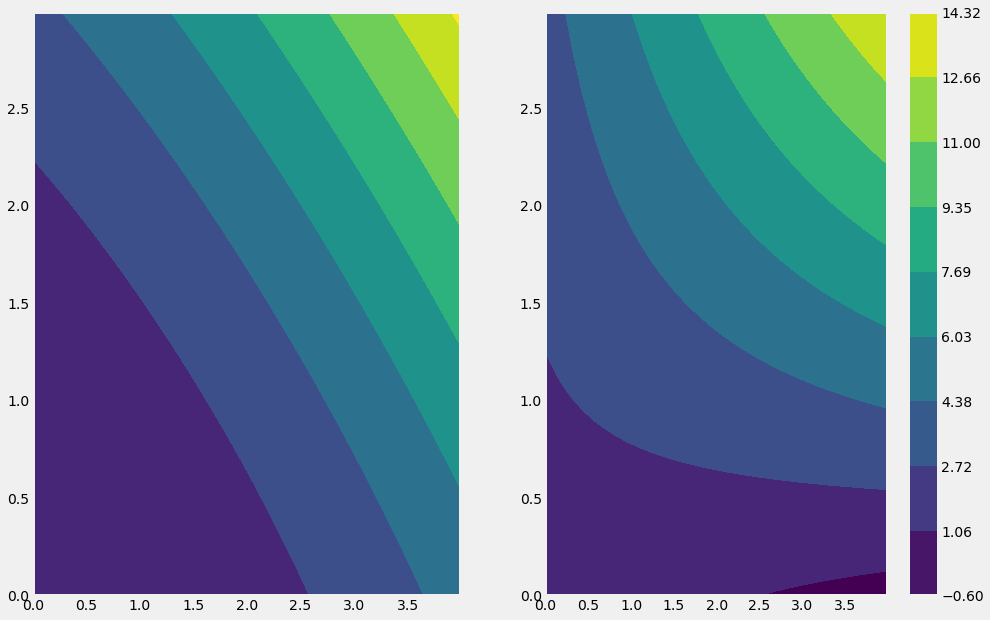

In [18]:
fig, axs = plt.subplots(1, 2)

vmin, vmax = (fun(np.concatenate([f12(xy_meshgrid[0], xy_meshgrid[1]),
                                  f21(xy_meshgrid[0], xy_meshgrid[1])]))
for fun in (np.min, np.max))

cs = axs[0].contourf(xy_meshgrid[0], 
                     xy_meshgrid[1],
                     f12(xy_meshgrid[0], xy_meshgrid[1]),
                     cmap=plt.cm.viridis, vmin=vmin, vmax=vmax)
cs = axs[1].contourf(xy_meshgrid[0],
                     xy_meshgrid[1],
                     f21(xy_meshgrid[0], xy_meshgrid[1]),
                     cmap=cs.cmap, vmin=vmin, vmax=vmax)
m = plt.cm.ScalarMappable(cmap=cs.cmap)
m.set_clim(vmin, vmax)
fig.colorbar(m, boundaries=np.linspace(vmin, vmax, 10))

Similarly to the one-dimensional case, the intersections of the conditions will be considered by intersection the Boolean masks

In [19]:
f12_range = f12(xy_meshgrid[0], xy_meshgrid[1]) >= f12_
f21_range = f12(xy_meshgrid[0], xy_meshgrid[1]) >= f21_

range_intersection = np.logical_and(f12_range, f21_range)
xy_pareto = [xy_meshgrid[0][range_intersection],
             xy_meshgrid[1][range_intersection]]

**Boolean mask of pareto set**

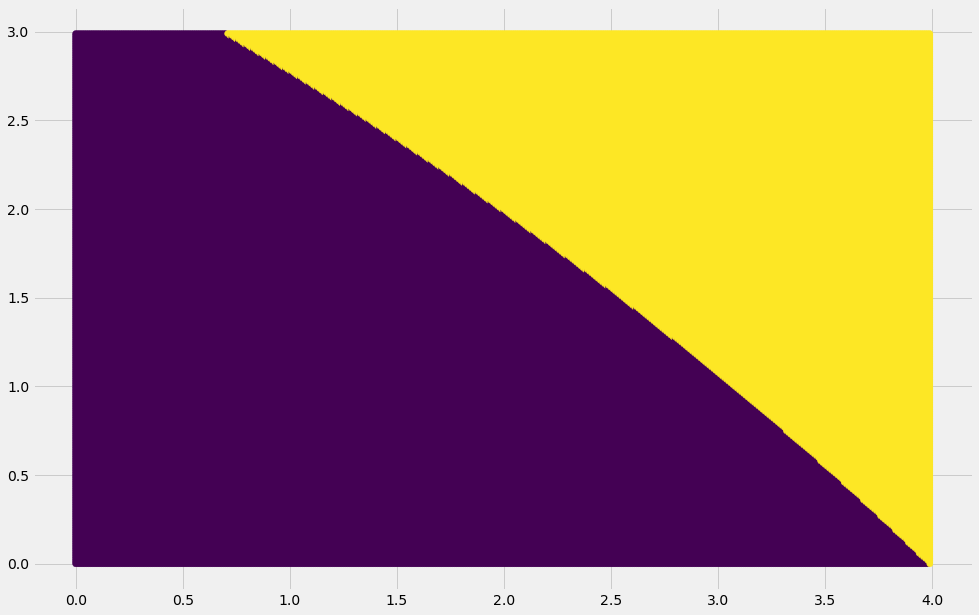

In [20]:
plt.scatter(xy_meshgrid[0], xy_meshgrid[1], c=range_intersection)

Building a dataframe for optimizations

In [21]:
log_length = 15

In [22]:
data = np.array([xy_pareto[0],
                 xy_pareto[1],
                 f12(xy_pareto[0], xy_pareto[1]),
                 f21(xy_pareto[0], xy_pareto[1])]).reshape(4, -1).T

tempDF = pd.DataFrame(data,
                      columns=['y','x', 'f12(x1, x2)', 'f21(x1, x2)'])

Calculation of dalt according to the formula `| f12 (x1, x2) - f12 * | | f21 (x1, x2) - f21 * | `

In [23]:
tempDF['d12'] = np.abs(tempDF['f12(x1, x2)'] - f12_)
tempDF['d21'] = np.abs(tempDF['f21(x1, x2)'] - f21_)

In [24]:
tempDF['max di'] = tempDF[['d12', 'd21']].max(axis=1)

Calculate `min max di`

In [25]:
tempDF['min max di'] = '-'

maxmin_value = tempDF['max di'].min(axis=0)

mask = tempDF['max di'] != tempDF['max di'].min(axis=0)
tempDF['min max di'] = tempDF['min max di'].where(
    mask, tempDF['max di'].min(axis=0))

tempDF.head(n=log_length)

y     x  f12(x1, x2)  f21(x1, x2)      d12     d21  max di min max di
0   0.71  2.99      4.78872       5.2309  0.01269  1.8389  1.8389          -
1   0.72  2.98      4.78048       5.2416  0.00445  1.8496  1.8496          -
2   0.72  2.99      4.80796       5.2568  0.03193  1.8648  1.8648          -
3   0.73  2.98      4.79973       5.2674  0.02370  1.8754  1.8754          -
4   0.73  2.99      4.82726       5.2827  0.05123  1.8907  1.8907          -
5   0.74  2.97      4.79154       5.2778  0.01551  1.8858  1.8858          -
6   0.74  2.98      4.81904       5.2932  0.04301  1.9012  1.9012          -
7   0.74  2.99      4.84662       5.3086  0.07059  1.9166  1.9166          -
8   0.75  2.96      4.78339       5.2880  0.00736  1.8960  1.8960          -
9   0.75  2.97      4.81086       5.3035  0.03483  1.9115  1.9115          -
10  0.75  2.98      4.83841       5.3190  0.06238  1.9270  1.9270          -
11  0.75  2.99      4.86604       5.3345  0.09001  1.9425  1.9425          -
12  0.76  2.96      4.80272       5.3136  0.02669  1.9216  1.9216          -
13  0.76  2.97      4.83024       5.3292  0.05421  1.9372  1.9372          -
14  0.76  2.98      4.85784       5.3448  0.08181  1.9528  1.9528          -

Thus, we obtained the necessary optimum points

In [26]:
tempDF[tempDF['max di'] == maxmin_value]

y     x  f12(x1, x2)  f21(x1, x2)      d12     d21  max di min max di
23933  3.16  0.92      4.78784       3.3792  0.01181  0.0128  0.0128     0.0128